## Import Bibliotek

In [88]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Activation, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Wczytanie danych

In [20]:
(X_train, y_train), (X_t, y_t) = fashion_mnist.load_data()

In [21]:
X_val, X_test, y_val, y_test = train_test_split(X_t, y_t, test_size=0.5)
print(f'zbior treningowy: {X_train.shape}, zbior walidacyjny: {X_val.shape}, zbior testowy: {X_test.shape}')

zbior treningowy: (60000, 28, 28), zbior walidacyjny: (5000, 28, 28), zbior testowy: (5000, 28, 28)


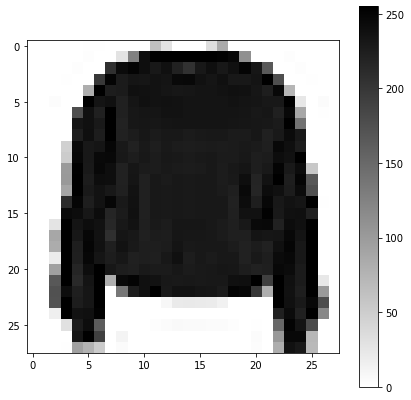

In [22]:
plt.figure(figsize=(7, 7))
plt.imshow(X_train[7],
           cmap=plt.cm.binary)
plt.colorbar()
plt.show()

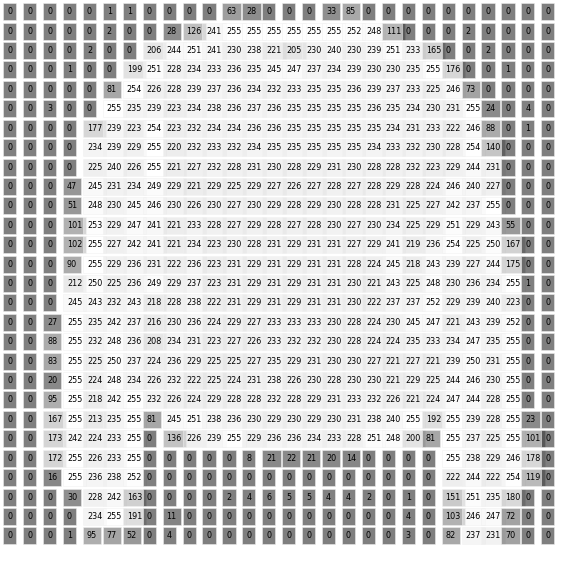

In [23]:
# wykres dla kazdego pixela
def plot_digit(digit, dem=28, font_size=8):
    max_ax = font_size * dem
    
    fig = plt.figure(figsize=(10, 10))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')
    
    for idx in range(dem):
        for jdx in range(dem):
            t = plt.text(idx*font_size,
                         max_ax - jdx*font_size,
                         digit[jdx][idx],
                         fontsize=font_size,
                         color='#000000')
            c = digit[jdx][idx] / 255.
            t.set_bbox(dict(facecolor=(c, c, c),
                            alpha=0.5,
                            edgecolor='#f1f1f1'))
    plt.show()
plot_digit(X_train[7])

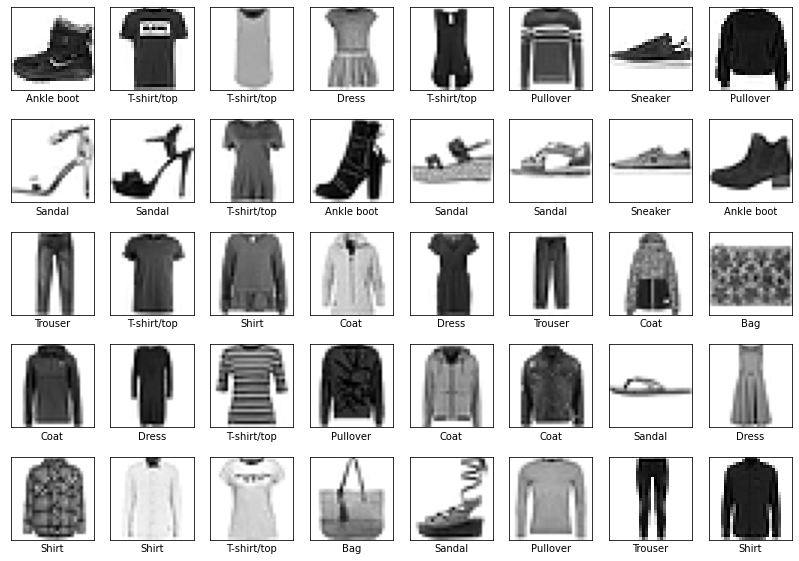

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(14, 10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], 
               cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Przygotowanie danych

In [25]:
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [27]:
y_train = to_categorical(y_train, len(class_names))
y_val = to_categorical(y_val, len(class_names))
y_test = to_categorical(y_test, len(class_names))

## Pierwsza architektura

In [32]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    verbose=1,
                    batch_size=256,
                    validation_data = (X_val, y_val))

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.6218 - accuracy: 0.7899 - val_loss: 0.4943 - val_accuracy: 0.8282
Epoch 2/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.4269 - accuracy: 0.8524 - val_loss: 0.4546 - val_accuracy: 0.8402
Epoch 3/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3882 - accuracy: 0.8646 - val_loss: 0.4200 - val_accuracy: 0.8544
Epoch 4/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3588 - accuracy: 0.8741 - val_loss: 0.4298 - val_accuracy: 0.8500
Epoch 5/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3433 - accuracy: 0.8789 - val_loss: 0.3911 - val_accuracy: 0.8600
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3236 - accuracy: 0.8842 - val_loss: 0.4099 - val_accuracy: 0.8576
Epoch 7/10
60000/60000 [==============================] -

## Wizualizacja

In [44]:
def draw_curves(history, key1='accuracy', ylim1=(0.8, 1.00), key2='loss', ylim2=(0.0, 1.0)):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history[key1], 'r--')
    plt.plot(history.history['val_' + key1], 'g--')
    plt.ylabel(key1)
    plt.xlabel('Epoch')
    plt.ylim(ylim1)
    plt.legend(['train', 'val'], loc='best')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history[key2], 'r--')
    plt.plot(history.history['val_' + key2], 'g--')
    plt.ylabel(key2)
    plt.xlabel('Epoch')
    plt.ylim(ylim2)
    plt.legend(['train', 'val'], loc='best')
    
    plt.show()            

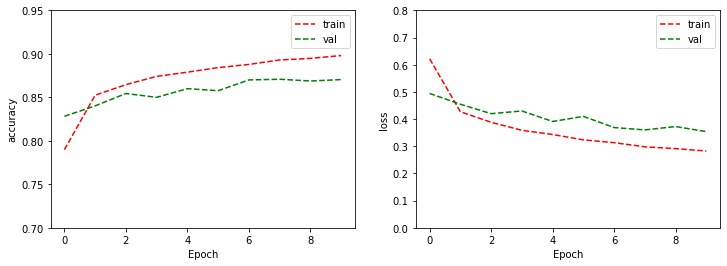

In [45]:
draw_curves(history, key1='accuracy', ylim1=(0.7, 0.95), key2='loss', ylim2=(0.0, 0.8))

In [46]:
# widać cały czas wzrost i spadek wiec można powiekszyć liczbę epochs

In [48]:
model2 = Sequential()

model2.add(Flatten(input_shape=(28, 28)))

model2.add(Dense(128, activation='relu'))

model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
history2 = model2.fit(X_train,
                      y_train,
                      epochs=50,
                      verbose=1,
                      batch_size=256,
                      validation_data = (X_val, y_val))

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.6230 - accuracy: 0.7893 - val_loss: 0.4969 - val_accuracy: 0.8322
Epoch 2/50
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4286 - accuracy: 0.8538 - val_loss: 0.4790 - val_accuracy: 0.8260
Epoch 3/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3884 - accuracy: 0.8641 - val_loss: 0.4290 - val_accuracy: 0.8474
Epoch 4/50
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3620 - accuracy: 0.8724 - val_loss: 0.4080 - val_accuracy: 0.8550
Epoch 5/50
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3400 - accuracy: 0.8802 - val_loss: 0.3791 - val_accuracy: 0.8688
Epoch 6/50
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3225 - accuracy: 0.8861 - val_loss: 0.4009 - val_accuracy: 0.8622
Epoch 7/50
60000/60000 [==============================] -

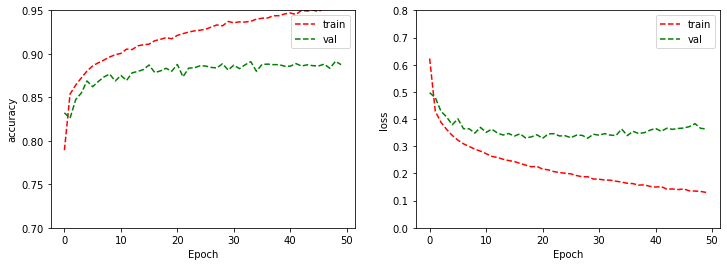

In [51]:
draw_curves(history2, key1='accuracy', ylim1=(0.7, 0.95), key2='loss', ylim2=(0.0, 0.8))

In [57]:
model3 = Sequential()

model3.add(Flatten(input_shape=(28, 28)))

model3.add(Dense(128, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dropout(0.2))

model3.add(Dense(10, activation='softmax'))

In [58]:
EarlyStop = EarlyStopping(monitor='val_loss',
                          patience=3,
                          verbose=1)

In [59]:
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [60]:
history3 = model3.fit(X_train,
                      y_train,
                      epochs=50,
                      verbose=1,
                      batch_size=256,
                      validation_data = (X_val, y_val),
                      callbacks = [EarlyStop])

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 60us/sample - loss: 1.3893 - accuracy: 0.7585 - val_loss: 0.7574 - val_accuracy: 0.8122
Epoch 2/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.6795 - accuracy: 0.8181 - val_loss: 0.6513 - val_accuracy: 0.8124
Epoch 3/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.6178 - accuracy: 0.8238 - val_loss: 0.5964 - val_accuracy: 0.8262
Epoch 4/50
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5957 - accuracy: 0.8250 - val_loss: 0.6002 - val_accuracy: 0.8250
Epoch 5/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5829 - accuracy: 0.8294 - val_loss: 0.6190 - val_accuracy: 0.8138
Epoch 6/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5692 - accuracy: 0.8327 - val_loss: 0.5855 - val_accuracy: 0.8206
Epoch 7/50
60000/60000 [==============================] -

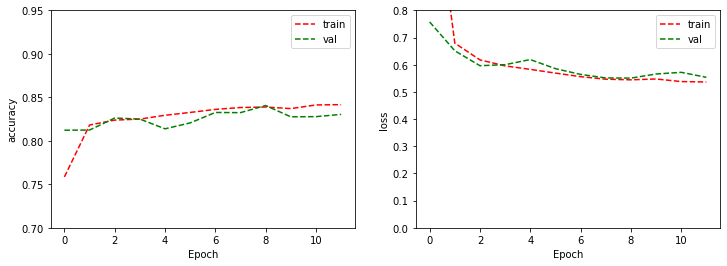

In [61]:
draw_curves(history3, key1='accuracy', ylim1=(0.7, 0.95), key2='loss', ylim2=(0.0, 0.8))

In [63]:
model_check = ModelCheckpoint(filepath='Najlepszy model',
                              monitor='var_loss',
                              save_best_only=True)

In [64]:
history3 = model3.fit(X_train,
                      y_train,
                      epochs=50,
                      verbose=1,
                      batch_size=256,
                      validation_data = (X_val, y_val),
                      callbacks = [EarlyStop, model_check])

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5303 - accuracy: 0.8413 - val_loss: 0.5378 - val_accuracy: 0.8412
Epoch 2/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5261 - accuracy: 0.8432 - val_loss: 0.5512 - val_accuracy: 0.8386
Epoch 3/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5218 - accuracy: 0.8454 - val_loss: 0.5289 - val_accuracy: 0.8430
Epoch 4/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5190 - accuracy: 0.8444 - val_loss: 0.5253 - val_accuracy: 0.8432
Epoch 5/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5221 - accuracy: 0.8449 - val_loss: 0.5305 - val_accuracy: 0.8396
Epoch 6/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5216 - accuracy: 0.8438 - val_loss: 0.5168 - val_accuracy: 0.8472
Epoch 7/50
60000/60000 [==============================] -

In [82]:
model_best = Sequential()

model_best.add(Flatten(input_shape=(28, 28)))

model_best.add(Dense(128, activation='relu'))
model_best.add(Dropout(0.4))

model_best.add(Dense(64, activation='relu'))
model_best.add(Dropout(0.3))

model_best.add(Dense(32, activation='relu'))
model_best.add(Dropout(0.2))

model_best.add(Dense(10, activation='softmax'))

model_best.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [83]:
EarlyStop = EarlyStopping(monitor='val_loss',
                          patience=5,
                          verbose=1)
model_check = ModelCheckpoint(filepath='Najlepszy model',
                              monitor='var_loss',
                              save_best_only=True)

In [84]:
best_history = model_best.fit(X_train,
                              y_train,
                              epochs=100,
                              verbose=1,
                              batch_size=2048,
                              validation_data=(X_val, y_val),
                              callbacks = [EarlyStop, model_check])

Train on 60000 samples, validate on 5000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 28us/sample - loss: 1.7336 - accuracy: 0.3729 - val_loss: 0.9733 - val_accuracy: 0.6488
Epoch 2/100
60000/60000 [==============================] - 1s 20us/sample - loss: 1.0605 - accuracy: 0.6136 - val_loss: 0.6977 - val_accuracy: 0.7572
Epoch 3/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8206 - accuracy: 0.7076 - val_loss: 0.5830 - val_accuracy: 0.7950
Epoch 4/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.7026 - accuracy: 0.7530 - val_loss: 0.5237 - val_accuracy: 0.8208
Epoch 5/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.6315 - accuracy: 0.7823 - val_loss: 0.4934 - val_accuracy: 0.8310
Epoch 6/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.5851 - accuracy: 0.7988 - val_loss: 0.4708 - val_accuracy: 0.8352
Epoch 7/100
60000/60000 [==========================

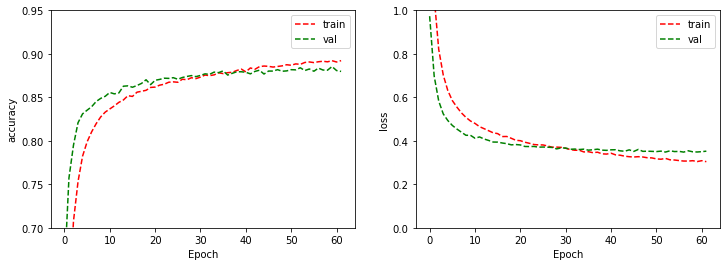

In [85]:
draw_curves(best_history, key1='accuracy', ylim1=(0.7, 0.95), key2='loss', ylim2=(0.0, 1.0))

In [92]:
y_train_pred = model.predict_classes(X_train) 
y_val_pred = model.predict_classes(X_val) 
y_test_pred = model.predict_classes(X_test)

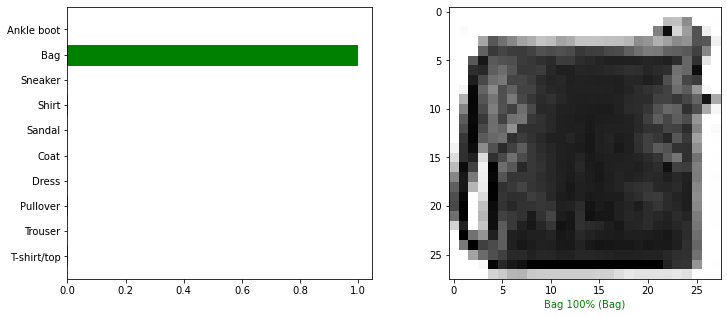

In [87]:
def plot_value_img(i, predictions, true_label, img):
    predictions, true_label, img = predictions[i], true_label[i], img[i]    
    predicted_label = np.argmax(predictions)
    true_value = np.argmax(true_label)   
     
    plt.figure(figsize=(12,5))
     
    plt.subplot(1, 2, 1)
     
    plt.yticks(np.arange(len(class_names)), class_names)
    thisplot = plt.barh(range(10), predictions, color="gray")      
    thisplot[predicted_label].set_color('r')
    thisplot[true_value].set_color('g')
 
    plt.subplot(1, 2, 2) 
     
    plt.imshow(img, cmap=plt.cm.binary)
    if predicted_label == true_value:
        color = 'green'
    else:
        color = 'red'
 
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions),
                                class_names[true_value]),
                                color=color)    
    plt.show()
     
plot_value_img(1, y_val_pred,  y_val, X_val)  